## Análise Exploratória de primeira categoria ##


### começando pelo básico ### 
* **1**: baixe o dataset que você irá utilizar
* **2** : importe os dados e olhe as primeiras linhas do dataset.

In [2]:
# Carre biblioteca pandas
import pandas as pd

# Carrega dataset
insurance = pd.read_csv( 'insurance.csv')

# Primeiras linhas do dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Possui diversas informações a respeito da pessoa, sua idade, sexo, IMC, quantos filhos possui, se é fumante, a região em que vive e os custos com plano de saúde.

O Yukio vai dizer, que ignorando as possibilidades de modelagem utilizando esses dados, o que muitas pessoas iriam fazer é utilzar funções tradicionais como o Scatter do matplotlib, um histograma ou gráfico do Seaborn de cotagem, como veremos a seguir!

#### Gráfico de dispersão ####

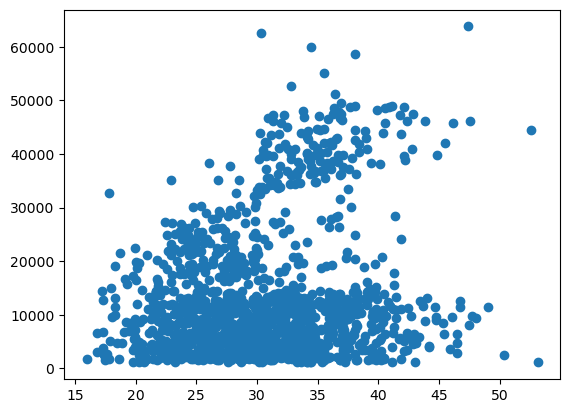

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data= insurance, x= 'bmi', y='charges')
plt.show()

#### Histograma ####

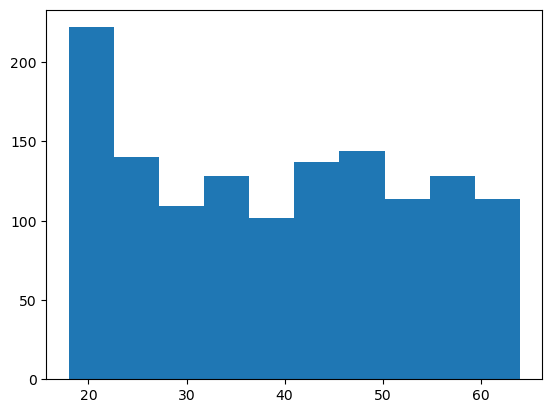

In [4]:
plt.hist( data= insurance, x= 'age')
plt.show()

#### gráfico de contagem ####

<Axes: xlabel='smoker', ylabel='count'>

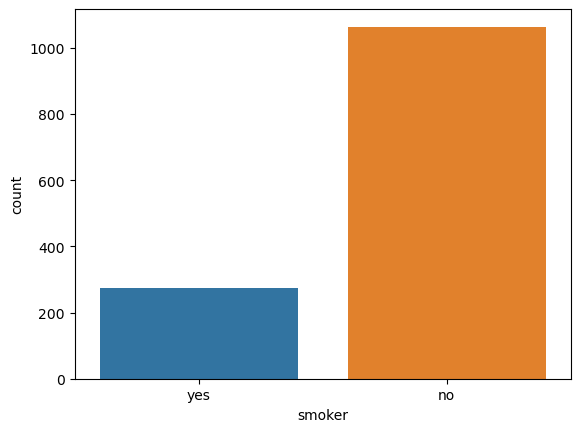

In [5]:
import seaborn as sns

sns.countplot( data= insurance, x= 'smoker')

#### Pulo do gato ####
Claro, os gráficos passam informações interessantes. Podemos ver, por exemplo, que há muito mais não fumantes do que fumantes no dataset. Podemos observar também uma concentração de jovens pelo histograma, ou ainda, uma baixa correlação entre IMC e gastos com saúde. Entretanto, nenhum dos gráficos acima se parece com o que a gente vê em notebooks que aparecem como vencedores de campeonatos do Kaggle, ou sendo muito aclamados na internet.

Não faltam apenas detalhes no título e nos rótulos, mas também faltam coisas que podem ajudar a interpretação, como caixas de mensagens, variação nas cores, além de criatividade mesmo, designs diferentes. O material de hoje será focado em levar vocë um pouco além na análise exploratória, vamos aprender a trabalhar melhor esses detalhes!

#### adicionando detalhes ao Gráfico ####

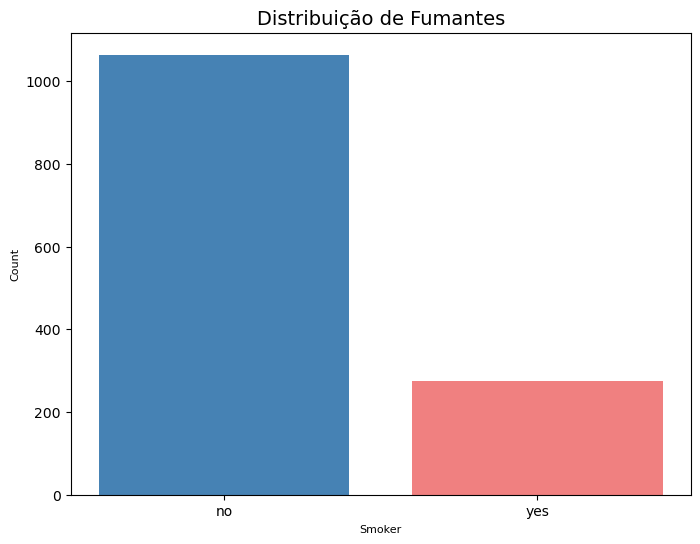

In [6]:
# Criando uma contagem
smoke_counts= insurance['smoker'].value_counts()

# Tamanho do Gráfico
plt.figure(figsize = (8, 6))

# Cria gráfico de barras com indice e contatagem
plt.bar(
    smoke_counts.index, #valor do eixo x
    smoke_counts.values, #valor do eixo y
    color = ['Steelblue', 'lightcoral'] #cores das barras
)

# Rotulo do eixo x, letra tamanho 8
plt.xlabel ('Smoker', fontsize = 8)

#rotulo do eixo y, letra tamanho 8
plt.ylabel('Count', fontsize = 8)

# Titulo, letra tamanho 14

plt.title('Distribuição de Fumantes', fontsize=14)
plt.show()

Veja que o gráfico no Matplotlib é bastante intuitivo, você apenas vai construindo parte por parte dele e adicionando (ou removendo) o que deseja através de comandos específicos, como xlabel (rótulo do eixo x), ylabel (rótulo do eixo y) e title (título do gráfico)!

Podemos ainda mexer nos contornos do "quadro" em que o gráfico é plotado

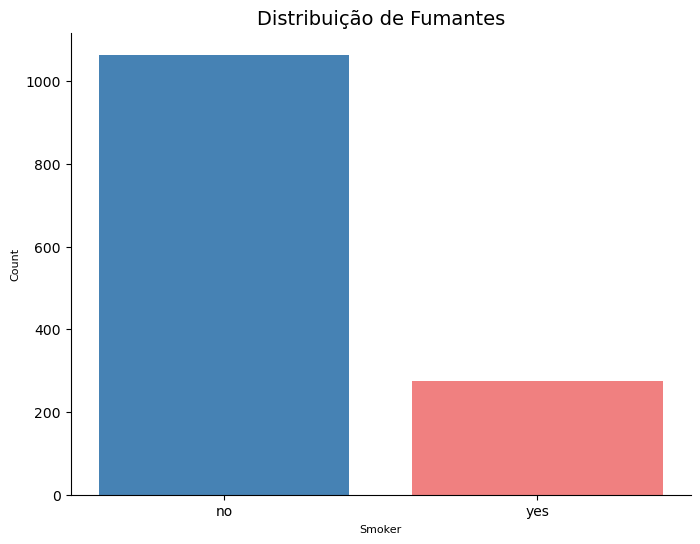

In [7]:
# Criando uma contagem
smoke_counts= insurance['smoker'].value_counts()

# Tamanho do Gráfico
plt.figure(figsize = (8, 6))

# Cria gráfico de barras com indice e contatagem
plt.bar(
    smoke_counts.index, #valor do eixo x
    smoke_counts.values, #valor do eixo y
    color = ['Steelblue', 'lightcoral'] #cores das barras
)

# Rotulo do eixo x, letra tamanho 8
plt.xlabel ('Smoker', fontsize = 8)

#rotulo do eixo y, letra tamanho 8
plt.ylabel('Count', fontsize = 8)

# Titulo, letra tamanho 14

plt.title('Distribuição de Fumantes', fontsize=14)

#Remove as linhas do topo e da direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Você vai ver que este segundo gráfico é bastante comum entre algumas pessoas mais experientes, pois segue as boas práticas ensinadas por referências da área, como é o caso de Edward Tufte. Nas boas práticas de análise exploratória, é falado muito sobre remover o que não é estritamente necessário, pois isso, em teste, facilita muito a leitura. Portanto, até mesmo essas linhas acabam sendo removidas.

Pela primeira vez, eu acho que o código ficou um pouco menos intuitivo, por conta do gca(). Esta é a abreviação de get current axes e precisa ser utilizada para mexer nos "spines", os contornos do quadro

onde traçamos o gráfico.

Eu acredito que existe um jeito mais intuitivo, de modo geral, mas que pode causar uma pequena confusão na sua mente no começo, por conta da mudança no núcleo da sintaxe.

Veja o código a seguir:

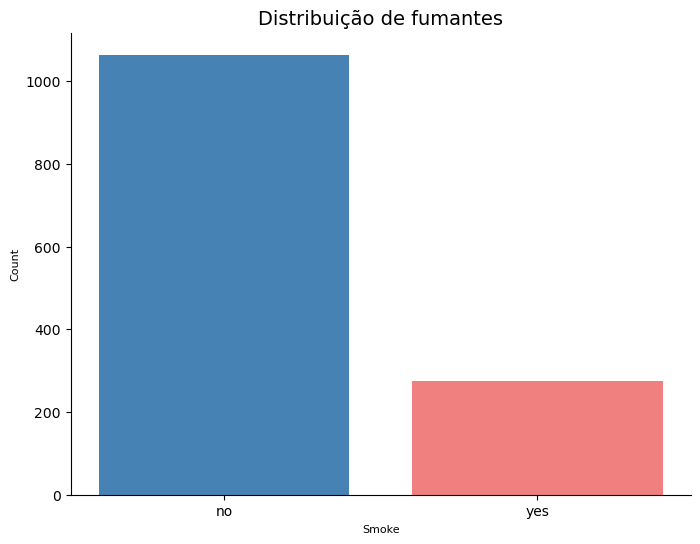

In [8]:
smoke_counts = insurance ['smoker'].value_counts()

colors = ['steelblue', 'lightcoral']

fig, ax = plt. subplots (figsize = (8, 6))
ax.bar(smoke_counts.index, smoke_counts.values, color= colors)
ax.set_xlabel('Smoke', fontsize = 8)
ax.set_ylabel('Count', fontsize = 8)
ax.set_title ('Distribuição de fumantes', fontsize = 14)

# Remove as linhas do topo e da Direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

O que pode causar estranheza é que além de mudar alguns comandos, como de title para set_title, estamos ainda utilizando o subplot() para a construção de um único gráfico.

Afinal, por que usar subplot se não há SUB-plots?

A questão é que o uso de subplot abre espaço para o uso de fig e ax, o que facilita bastante na manutenção dos detalhes da imagem. No exemplo dado, fig e ax são variáveis que representam o objeto da figura e o objeto do eixo, respectivamente, criados usando a função subplots(). A figura (fig) é o objeto que representa a área em branco onde o gráfico será desenhado. Ela pode conter um ou mais eixos (ax). O eixo (ax) é onde os elementos do gráfico, como barras, linhas, pontos, entre outros, são plotados. Ao criar a figura e o eixo usando 'fig, ax = plt.subplots(figsize=(8, 6))', estamos atribuindo o objeto da figura à variável fig e o objeto do eixo à variável ax.

Em seguida, as funções como 'ax.bar()', 'ax.set_xlabel()', 'ax.set_ylabel()', 'ax.set_title()', entre outras, são usadas para configurar e personalizar o gráfico no eixo específico (ax). Ter objetos separados para a figura e o eixo é útil quando você deseja fazer modificações específicas em um ou em ambos separadamente. Por exemplo, ajustar o tamanho da figura, alterar as propriedades dos eixos, adicionar legendas ou títulos, configurar os limites dos eixos, e assim por diante. No final, a chamada 'plt.show()' é usada para exibir o gráfico na tela com todas as configurações e personalizações aplicadas.

Em resumo, fig é a figura que contém o gráfico e ax é o eixo em que o gráfico é plotado. Eles fornecem uma estrutura organizada para a criação e configuração de gráficos.

Quer ver mais um exemplo do Matplotlib, para reforçar? Bora:

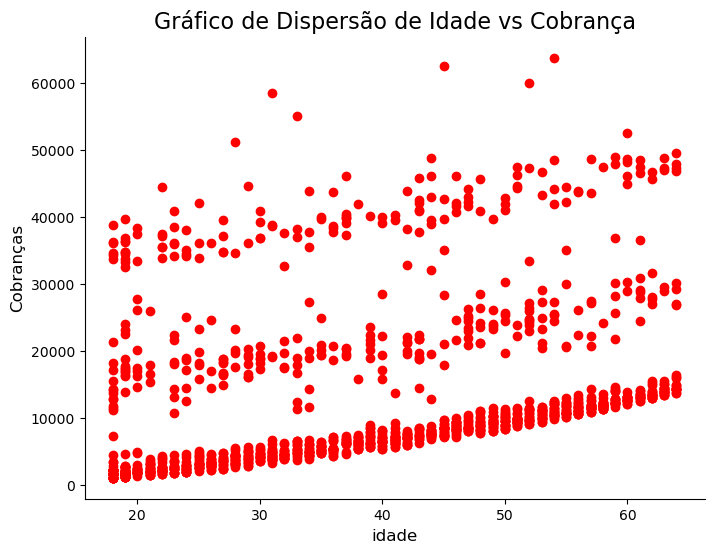

In [9]:
# Criação do gráfico de dispersão
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(insurance['age'], insurance['charges'], c='red')

# Configuração do título e rótulos dos eixos
ax.set_title('Gráfico de Dispersão de Idade vs Cobrança', fontsize=16)
ax.set_xlabel('idade', fontsize=12)
ax.set_ylabel('Cobranças', fontsize= 12)

# Remoção das linhas superior e da direita

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o Gráfico

plt.show()

Ficou mais tranquilo, não?

Aliás, você notou que parece existir uma correlação, ainda que fraca, entre idade e cobrança? Parece que temos 3 retas ascendentes. Vale dar uma investigada no futuro!

Bom, antes de avançar, que tal você testar seus conhecimentos? Não tem nenhuma análise exploratória sua que valeria a

pena dar uma trabalhada nos detalhes?

Eu aposto que tem, vale dar uma pausa e já fazer uns testes, aproveitando para reforçar o que foi aprendido!

Dando sequência, vamos para o uso do subplot na criação de múltiplos gráficos. Eu quero criar, por exemplo, um gráfico de dispersão de cobrança x idade e de cobrança x bmi lado a lado, isso vai facilitar a leitura da análise!

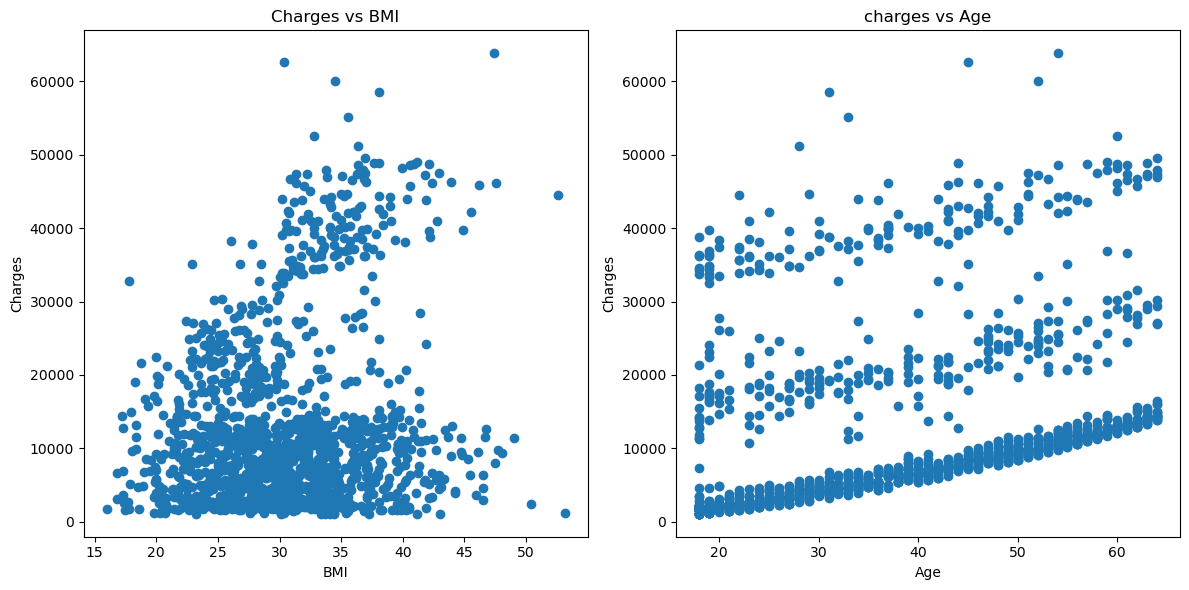

In [10]:
# Cria o local, a configuração do plot
fig, axes = plt.subplots(
    1, #numero de linhas
    2, #numero de colunas
    figsize = (12,6) # Tamanho do plot
)

#Gráfico de dispersão de BMI x Charges na posição 0
#( linha 0, coluna 0)

axes[0].scatter(insurance['bmi'], insurance['charges'])
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('Charges vs BMI')

# Gráfico de dispersão de Age x Charges na posição 1
# (linha 0, coluna 1)

axes[1].scatter(insurance['age'], insurance['charges'])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges')
axes[1].set_title('charges vs Age')

# Ajusta espaço entre os plots

plt.tight_layout()

# Apresenta o Gráfico
plt.show()

Vamos complicar? Que tal fazermos uma análise que envolva uma variável categórica e uma numérica? E aí, bora demonstrar como pegar a média de charges por cada classe de diferentes variáveis categóricas?

Você poderia fazer isso com o matplotlib, usando o bar plot. Entretanto, para ampliarmos mais o número de ferramentas que você conhece, vou utilizar a estratégia para plotar gráfico com o Pandas!

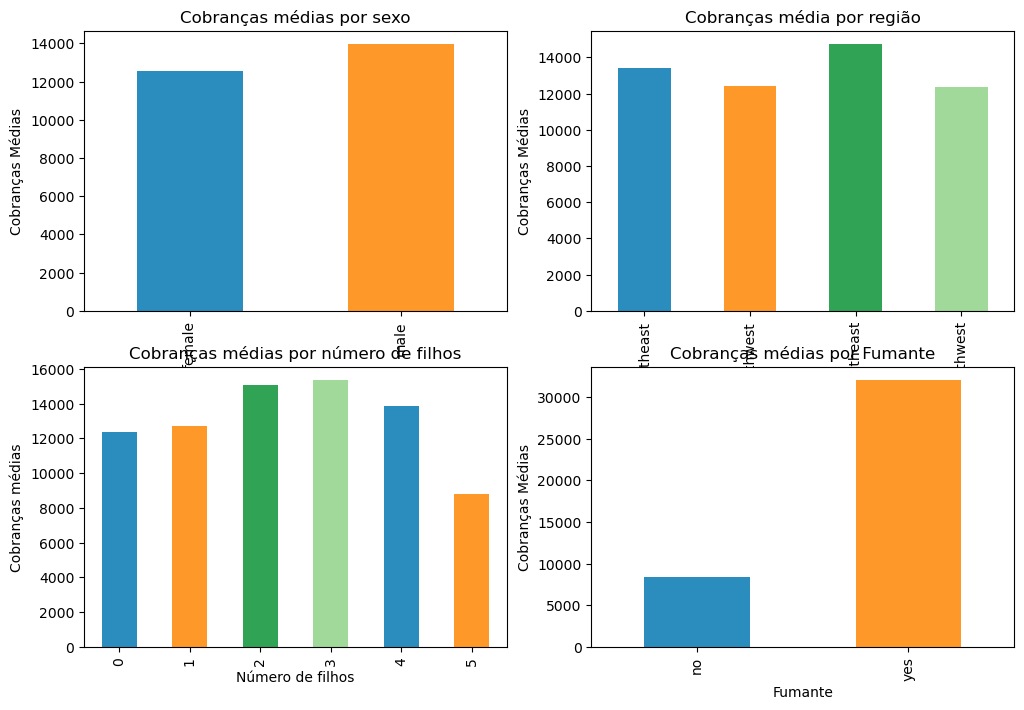

In [11]:
# Calcular as médias das cobranças para cada categoria de 'sex'
mean_charges_sex = insurance.groupby('sex')['charges'].mean()

# Calcular as médias das cobranças para cada categoria de 'region'
mean_charges_region = insurance.groupby('region')['charges'].mean()

# Calcular as médias das cobranças para cada categoria de 'children'
mean_charges_children = insurance.groupby('children')['charges'].mean()

# Calcular as médias das cobranças para cada categoria de 'Smoker'
mean_charges_smoker = insurance.groupby('smoker')['charges'].mean()

# Cores personalizadas para as barras
colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

# Criar uma figura de subplots
fig, axes = plt.subplots (2, 2, figsize = (12, 8))

# Gráfico de barras : média das cobranças por sexo
mean_charges_sex.plot(kind ='bar', ax = axes [0, 0], color = colors)
axes [0, 0].set_xlabel('Sexo')
axes [0, 0].set_ylabel('Cobranças Médias')
axes [0, 0].set_title(' Cobranças média por sexo')

#Gráfico de barras: média das cobranças por sexo
mean_charges_sex.plot(kind='bar', ax=axes[0,0], color = colors)
axes [0, 0].set_xlabel('Sexo')
axes [0,0].set_ylabel('Cobranças Médias')
axes [0,0].set_title('Cobranças médias por sexo')

# Gráfico de barras:  média das cobranças por região
mean_charges_region.plot(kind='bar', ax=axes[0,1], color= colors)
axes [0, 1].set_xlabel('Região')
axes [0, 1].set_ylabel('Cobranças Médias')
axes [0, 1].set_title ('Cobranças média por região')

#Gráfico de barras : média das cobranças por número de filho
mean_charges_children.plot(kind = 'bar', ax= axes [1,0], color=colors)
axes[1,0].set_xlabel('Número de filhos')
axes[1,0].set_ylabel('Cobranças médias')
axes[1,0].set_title('Cobranças médias por número de filhos')

#Gráfico de barras : média das cobranças por fumante
mean_charges_smoker.plot(kind= 'bar', ax= axes[1,1], color=colors)
axes[1,1].set_xlabel('Fumante')
axes[1,1].set_ylabel('Cobranças Médias')
axes[1,1].set_title('Cobranças médias por Fumante')

#ajustar espaçamento entre os subplots
plt.tight_layout

#exibir o gráfico
plt.show()

Desafio 1: Construa estes mesmos gráficos, mas com o Matplotlib, ao invés do Pandas.

Desafio 2: Remova os spines do topo e da direita dos 4 gráficos.

E se quisermos subplots de gráficos do Seaborn?

Neste caso, muda um pouco, pois a posição do eixo (ax) será passada como um parâmetro da função que você está usando para traçar o gráfico.

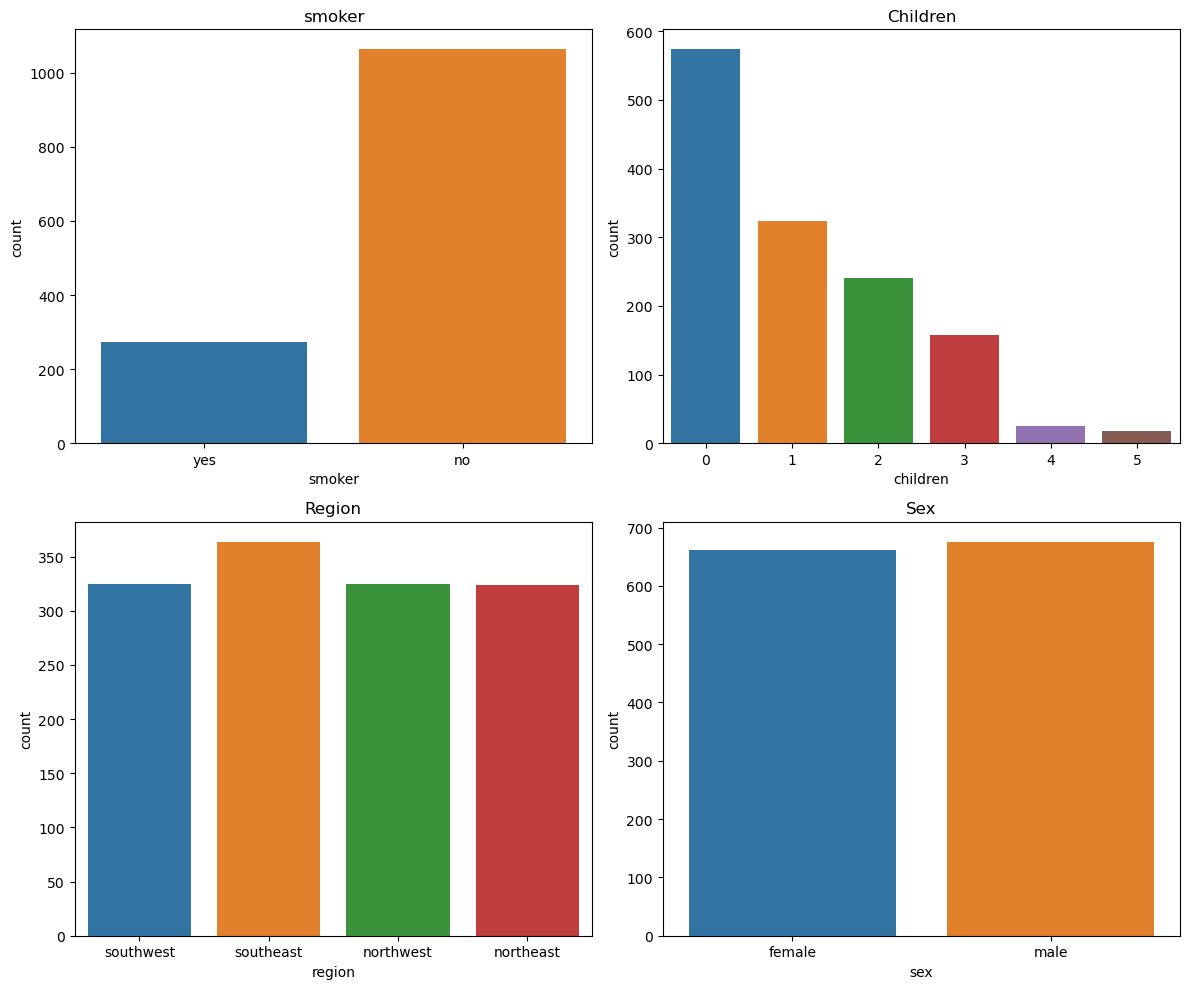

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma figura com 2 linhas e 2 colunas
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

# Primeira linha, primeira coluna: gráfico de smoker
sns.countplot(data= insurance, x='smoker', ax=ax[0,0])
ax[0,0].set_title('smoker')

# Primeira linha, segunda coluna: gráfico de children
sns.countplot(data = insurance, x= 'children', ax= ax[0,1])
ax[0,1].set_title('Children')
# segunda linha, primeira coluna: gráfico de region
sns.countplot(data= insurance, x ='region', ax=ax[1,0])
ax[1,0].set_title('Region')

# segunda linha, segunda coluna : gráfico de sex
sns.countplot( data = insurance, x='sex', ax= ax[1,1])
ax [1,1].set_title('Sex')

#Ajusta o Layout para evitar sobreposição
plt.tight_layout()

#mostra os gráficos
plt.show()

Desafio 3: Que tal escrever um tutorial explicando detalhadamente cada parâmetro do Matplotlib ou do Seaborn? Não é todo mundo que sabe tantos detalhes!

Certo, agora já sabemos fazer gráficos com o máximo de detalhes, mexendo nos textos, nas cores e até mesmo nas linhas do "quadro" (local do plot) dele. Mas alguns truques ficaram de fora e eu vou mostrar agora:

E se quisermos subplots de gráficos do Seaborn?

Neste caso, muda um pouco, pois a posição do eixo (ax) será passada como um parâmetro da função que você está usando para traçar o gráfico.

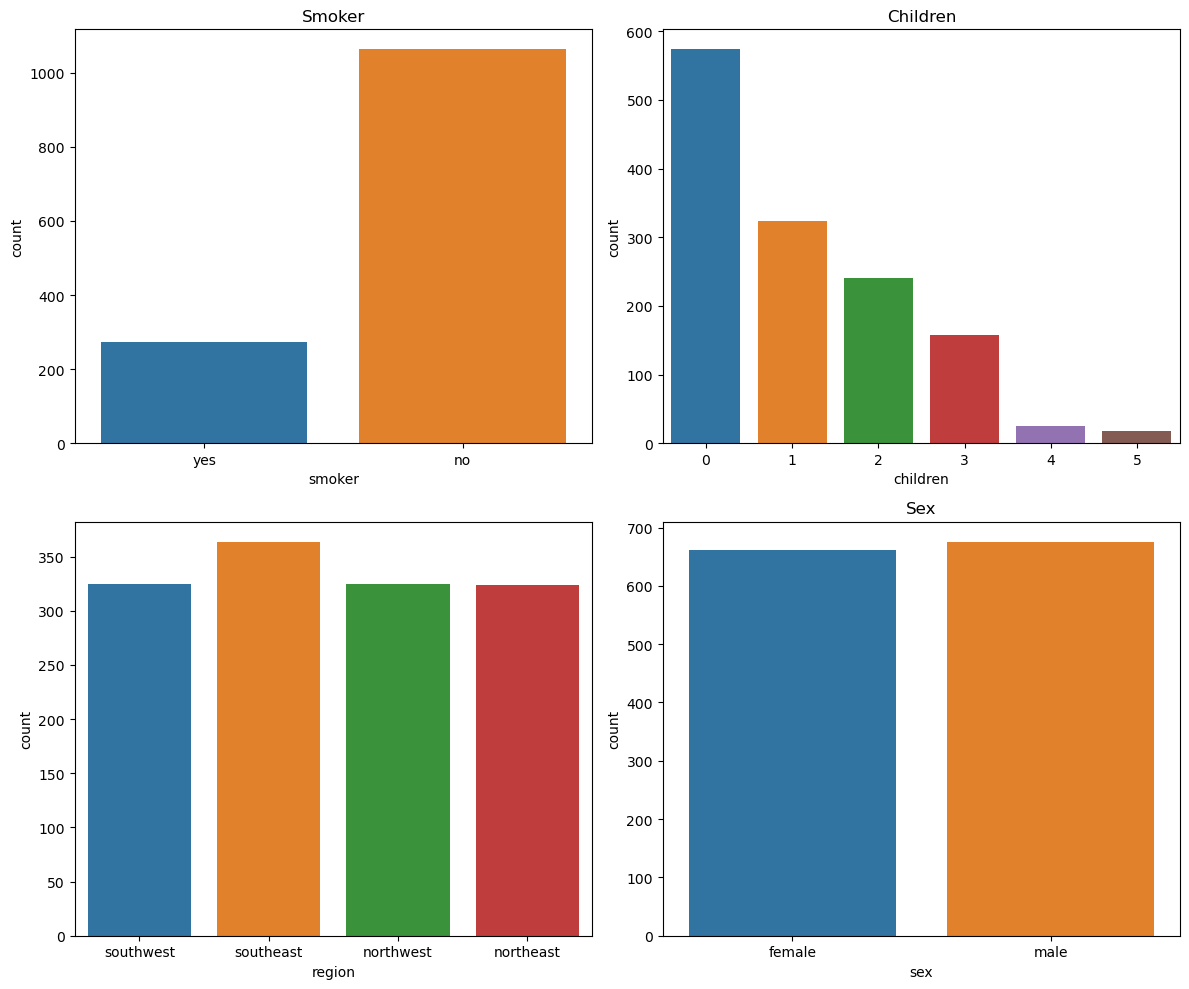

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma figura com 2 linhas e 2 colunas
fig, ax = plt.subplots(2, 2, figsize = (12,10))

# Primeira linha, primeira coluna: gráfico de smoker
sns.countplot(data= insurance, x ='smoker', ax=ax[0,0])
ax[0,0].set_title('Smoker')

# Primeira linha, segunda coluna : gráfico de Children
sns.countplot(data= insurance, x = 'children', ax=ax[0,1])
ax[0, 1].set_title('Children')

# Segunda linha, primeira coluna : gráfico de região
sns.countplot(data= insurance, x='region', ax=ax[1,0])
ax [1, 1].set_title('Region')

# Segunda linha, segunda coluna: gráfico de sex
sns.countplot(data= insurance, x= 'sex', ax=ax[1,1])
ax[1,1].set_title('Sex')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

#mostra os gráficos

plt.show()

Desafio 3: Que tal escrever um tutorial explicando detalhadamente cada parâmetro do Matplotlib ou do Seaborn? Não é todo mundo que sabe tantos detalhes!

Certo, agora já sabemos fazer gráficos com o máximo de detalhes, mexendo nos textos, nas cores e até mesmo nas linhas do "quadro" (local do plot) dele. Mas alguns truques ficaram de fora e eu vou mostrar agora:

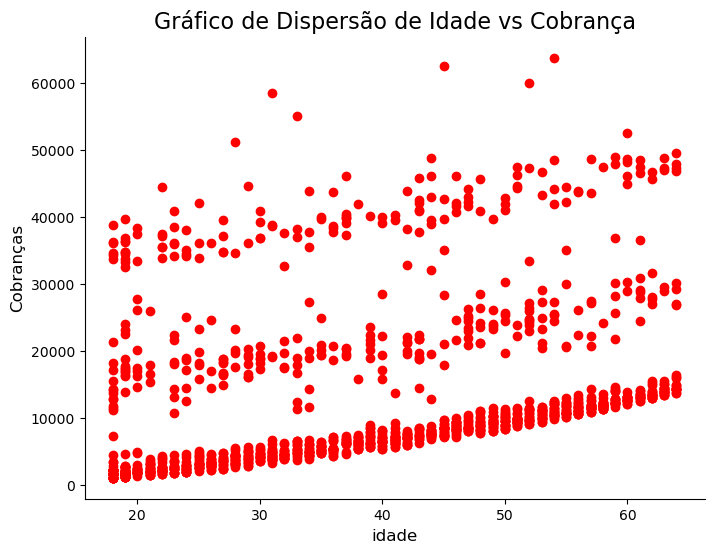

In [14]:
# Criação do gráfico de dispersão
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(insurance['age'], insurance['charges'], c='red')

# Configuração do título e rótulos dos eixos
ax.set_title('Gráfico de Dispersão de Idade vs Cobrança', fontsize=16)
ax.set_xlabel('idade', fontsize=12)
ax.set_ylabel('Cobranças', fontsize= 12)

# Remoção das linhas superior e da direita

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o Gráfico

plt.show()

# Altera o estido dos gráficos do notebook
plt.style.use('ggplot')

Eu achei muito melhor!

Outros estilos populares que você pode testar: fivethirtyeight, dark_background, classic.

Todos os estilos disponíveis você encontra aqui: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

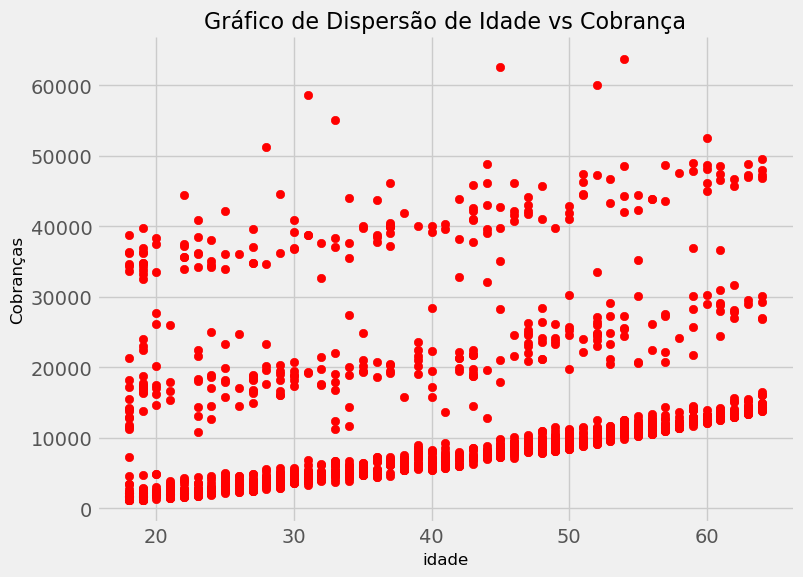

In [15]:

# Altera o estido dos gráficos do notebook
plt.style.use('fivethirtyeight')

# Criação do gráfico de dispersão
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(insurance['age'], insurance['charges'], c='red')

# Configuração do título e rótulos dos eixos
ax.set_title('Gráfico de Dispersão de Idade vs Cobrança', fontsize=16)
ax.set_xlabel('idade', fontsize=12)
ax.set_ylabel('Cobranças', fontsize= 12)

# Remoção das linhas superior e da direita

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o Gráfico

plt.show()


Normalmente, colocamos o plt.style.use() na primeira célula do notebook, para pré-definir os estilos dos gráficos naquele reporte. Além disso, também é possível deixar o tamanho dos gráficos já pré-definido. Utilizar o comando 'mpl.rcParams' é uma maneira de manipular a configuração de gráficos do Matplotlib globalmente em um script Python. O rcParams é um dicionário (uma instância da classe matplotlib.RcParams) que armazena os valores padrão para várias propriedades que você pode controlar no Matplotlib.

Por exemplo, se você quiser definir o tamanho padrão para todos os seus gráficos:

In [16]:
# carrega a Biblioteca
import matplotlib as mpl

# Definindo o tamanho padrão dos gráficos
mpl.rcParams['figure.figsize'] = [10, 5]

Neste exemplo, o tamanho padrão para todos os gráficos será 10 x 5 (largura x altura).

Você pode alterar muitas outras propriedades com 'rcParams', como:

- lines.linewidth: a espessura das linhas

- axes.titlesize: o tamanho da fonte do título dos eixos

- axes.labelsize: o tamanho da fonte dos rótulos dos eixos

- xtick.labelsize e ytick.labelsize: o tamanho da fonte dos rótulos dos ticks

- legend.fontsize: o tamanho da fonte da legenda

- figure.dpi: a resolução dos gráficos

Para ver todas as opções disponíveis, você pode printar o dicionário rcParams:

In [17]:
import matplotlib as mpl

for key in mpl.rcParams.keys() :
    print(key)

_internal.classic_mode
agg.path.chunksize
animation.bitrate
animation.codec
animation.convert_args
animation.convert_path
animation.embed_limit
animation.ffmpeg_args
animation.ffmpeg_path
animation.frame_format
animation.html
animation.writer
axes.autolimit_mode
axes.axisbelow
axes.edgecolor
axes.facecolor
axes.formatter.limits
axes.formatter.min_exponent
axes.formatter.offset_threshold
axes.formatter.use_locale
axes.formatter.use_mathtext
axes.formatter.useoffset
axes.grid
axes.grid.axis
axes.grid.which
axes.labelcolor
axes.labelpad
axes.labelsize
axes.labelweight
axes.linewidth
axes.prop_cycle
axes.spines.bottom
axes.spines.left
axes.spines.right
axes.spines.top
axes.titlecolor
axes.titlelocation
axes.titlepad
axes.titlesize
axes.titleweight
axes.titley
axes.unicode_minus
axes.xmargin
axes.ymargin
axes.zmargin
axes3d.grid
axes3d.xaxis.panecolor
axes3d.yaxis.panecolor
axes3d.zaxis.panecolor
backend
backend_fallback
boxplot.bootstrap
boxplot.boxprops.color
boxplot.boxprops.linestyle
bo

Lembre-se de que as alterações feitas ao rcParams são globais e afetarão todos os gráficos criados após sua execução. Se você quiser alterar as propriedades apenas para um gráfico específico, faça isso localmente, ajustando as propriedades do objeto de gráfico individual.

Nossa, já sabemos MUITA coisa de Matplotlib! Mas tem algo bem simples faltando, você chegou a notar? Você reparou que nossos gráficos não possuem o valor em cima das barras, ou em qualquer lugar que seja dentro deles?

Colocar rótulos nos gráficos não é tão simples no começo, nem parece muito intuitivo. Mesmo assim, eu garanto que fica fácil com a prática. Tudo o que você precisa entender é que o Matplotlib usa o plt.text() para adicionar textos, mas que você precisa dar a exata localização de onde o texto deve ser incluído.

Veja, o plt.text() é capaz de criar o texto que você quiser na posição que você der:

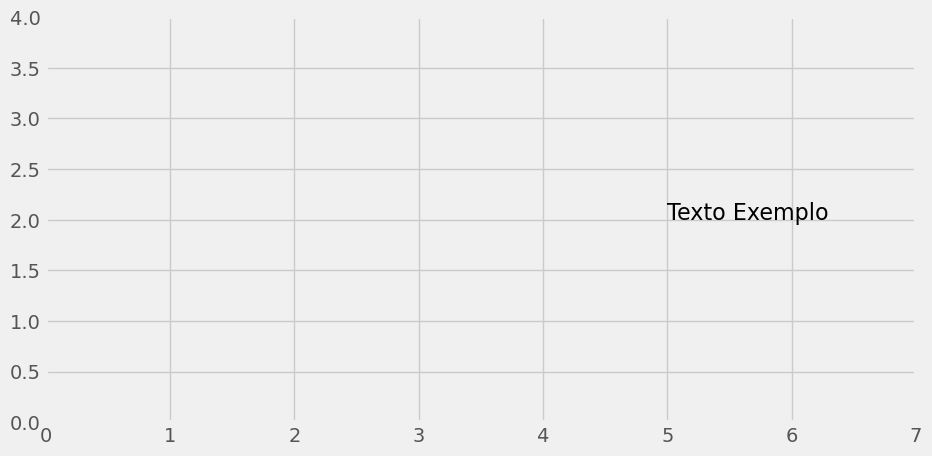

In [18]:
# Cria um texto na posição 5 do eixo x
# e na posição 2 do eixo y, no tamanho 16

plt.text(
    5,
    2,
    'Texto Exemplo',
    size = 16
)

# Definindo os limites de nossos eixos 
# x vai de 0 a 7, y vai de 0 a 4
plt.xlim(0,7)
plt.ylim(0,4)

#Exibe gráfico
plt.show()

Veja que nós passamos os valores indicando a posição onde o texto deveria começar, sendo 5 no eixo x e 2 no eixo y. Além disso, passamos o texto a ser escrito e o tamanho da letra.

É isso o que espanta as pessoas, ter que ficar localizando onde colocar os textos. Afinal, diferente de outros softwares, nós precisaremos determinar exatamente onde os rótulos dos valores devem ficar.

Por outro lado, você vai ver que, como tudo no Python, estes textos são bem customizáveis! Veja um exemplo dado no site do próprio Matplotlib:

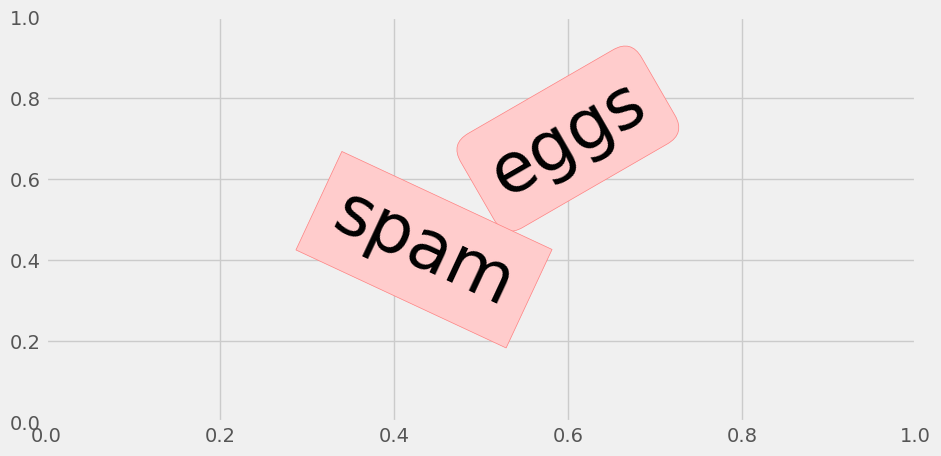

In [19]:
import matplotlib.pyplot as plt

plt.text(0.6, 0.7, 'eggs', size=50,
rotation=30.,
        ha= 'center', va='center',
        bbox=dict(boxstyle = 'round',
                  ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8),
                )
        )

plt.text(0.55, 0.6, "spam", size=50,
rotation= -25.,
        ha='right', va='top',
        bbox=dict(boxstyle='square',
                  ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8),
                  )
        )

plt.show()

Vamos ver na prática como funcionaria colocar os rótulos de valores nos nossos gráficos:


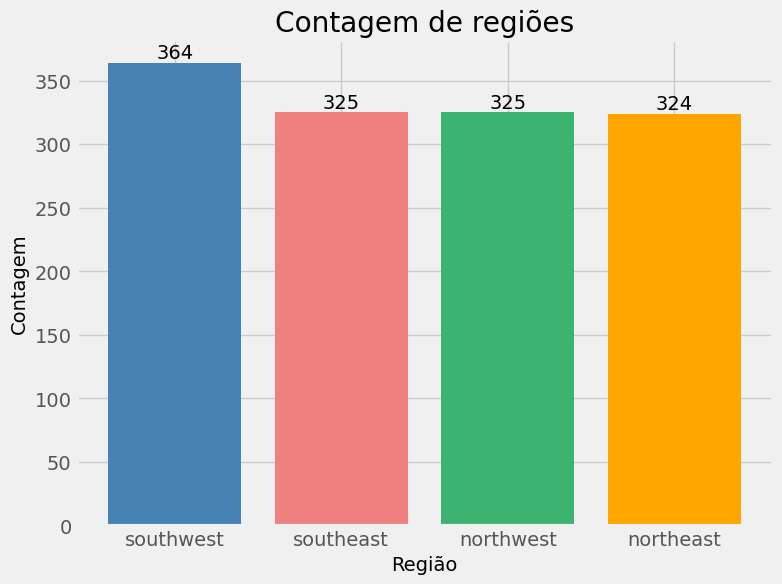

In [20]:
import matplotlib.pyplot as plt

# Cria uma contagem para cada região
region_types = insurance['region'].value_counts()

#Listamos as regiões existentes
region_names=['southwest', 'southeast', 'northwest', 'northeast']

# Cores personalizadas para cada barra
colors= ['steelblue', 'lightcoral','mediumseagreen','orange']

#cria uma figura e um eixo
fig, ax = plt.subplots(figsize= (8,6))

# Plota o gráfico de barras com as cores personalizadas
ax.bar(region_names, region_types.values, color = colors)

# Configurações dos rótulos dos eixos e títulos
ax.set_xlabel('Região')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de regiões')

# Adiciona a contagem sobre cada barra
for i, v in enumerate(region_types.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Exibe o gráfico

plt.show()

Correndo o risco de ficar redundante, vamos explicar passo a passo do que foi feito, porque quero garantir o entendimento do matplotlib, então você vai poder voltar a este material quantas vezes forem necessárias:

1. Importamos a biblioteca matplotlib.pyplot com a abreviação plt, que é a biblioteca principal para visualização de gráficos no Matplotlib.

2. Definimos a variável region_types como a contagem de ocorrências de cada tipo de região no DataFrame `insurance`. Isso é feito usando o método value_counts() no DataFrame, que conta as ocorrências de cada valor único na coluna region.

3. Definimos a lista region_names com os nomes das regiões existentes. Esses nomes devem corresponder aos valores únicos da coluna region no DataFrame insurance.

4. Definimos a lista colors com as cores personalizadas que serão atribuídas a cada barra no gráfico de barras. Cada cor da lista colors deve corresponder a uma região específica.

5. Criamos uma figura e um eixo usando a função subplots() do Matplotlib. Passamos o parâmetro figsize=(8, 6) para definir o tamanho da figura com largura de 8 polegadas e altura de 6 polegadas.

6. Usamos o método bar() no eixo ax para plotar o gráfico de barras. Passamos a lista region_names como os valores do eixo x e os valores da contagem region_types.values como os valores do eixo y. Também passamos a lista colors como o parâmetro color para atribuir cores personalizadas a cada barra.

7. Configuramos os rótulos dos eixos usando os métodos set_xlabel() e set_ylabel() no eixo ax, e definimos o título do gráfico usando o método set_title().

8. Utilizamos um loop usando o for para percorrer todos os valores de region_types.values. Em cada iteração, cada vez que o loop passava por um valor, a gente aplicava a função text() no nosso eixo (chamado de ax) para adicionar o valor da contagem sobre a barra correspondente. Veja que o enumerate vai nos dar um dos valores de region_types.values e também a ordem desse valor. Sendo assim, cada loop nos retorna um índice (um número ordenado) e o valor da contagem. Então quando o loop começa, ele retorna o número 1 e o valor da primeira contagem. A gente vai colocar isso no gráfico como sendo a posição no eixo x e no eixo y. Veja abaixo em que resulta cada loop:

Correndo o risco de ficar redundante, vamos explicar passo a passo do que foi feito, porque quero garantir o entendimento do matplotlib, então você vai poder voltar a este material quantas vezes forem necessárias:

1. Importamos a biblioteca matplotlib.pyplot com a abreviação plt, que é a biblioteca principal para visualização de gráficos no Matplotlib.

2. Definimos a variável region_types como a contagem de ocorrências de cada tipo de região no DataFrame `insurance`. Isso é feito usando o método value_counts() no DataFrame, que conta as ocorrências de cada valor único na coluna region.

3. Definimos a lista region_names com os nomes das regiões existentes. Esses nomes devem corresponder aos valores únicos da coluna region no DataFrame insurance.

4. Definimos a lista colors com as cores personalizadas que serão atribuídas a cada barra no gráfico de barras. Cada cor da lista colors deve corresponder a uma região específica.

5. Criamos uma figura e um eixo usando a função subplots() do Matplotlib. Passamos o parâmetro figsize=(8, 6) para definir o tamanho da figura com largura de 8 polegadas e altura de 6 polegadas.

6. Usamos o método bar() no eixo ax para plotar o gráfico de barras. Passamos a lista region_names como os valores do eixo x e os valores da contagem region_types.values como os valores do eixo y. Também passamos a lista colors como o parâmetro color para atribuir cores personalizadas a cada barra.

7. Configuramos os rótulos dos eixos usando os métodos set_xlabel() e set_ylabel() no eixo ax, e definimos o título do gráfico usando o método set_title().

8. Utilizamos um loop usando o for para percorrer todos os valores de region_types.values. Em cada iteração, cada vez que o loop passava por um valor, a gente aplicava a função text() no nosso eixo (chamado de ax) para adicionar o valor da contagem sobre a barra correspondente. Veja que o enumerate vai nos dar um dos valores de region_types.values e também a ordem desse valor. Sendo assim, cada loop nos retorna um índice (um número ordenado) e o valor da contagem. Então quando o loop começa, ele retorna o número 1 e o valor da primeira contagem. A gente vai colocar isso no gráfico como sendo a posição no eixo x e no eixo y. Veja abaixo em que resulta cada loop:

Ou seja, nosso texto será colocado primeiro na posição 0 do eixo x e na posição 364 do eixo y. Já o segundo texto, será colocado na posição 1 no eixo-x e na posição 325 do eixo-y. O eixo-x é o eixo na horizontal, enquanto o eixo-y é a altura.

Veja como inserimos o texto:

ax.text(i, v, str(v), ha='center', va='bottom')

Veja que esta função é a mesma que demonstrei lá em cima no plt.text(), ela está recebendo a posição no eixo x, a posição no eixo y e o texto a ser inserido. Ou seja, quando i for 0 e v for 364, que é o caso da primeira iteração do loop, nós teremos basicamente a função abaixo:

ax.text(0, 364, str(364))

Em outras palavras, vamos colocar na posição 0 do eixo x e na posição 364 do eixo y, o texto 364, que é a contagem para aquela barra!

Reforçando mais uma vez: Passamos para a posição x, o valor de i; para a posição y, que é a altura, passamos o valor v; e o texto a ser inserido será o valor de v convertido para uma string, str(v). Esses são os principais parâmetros de text(). Além deles, definimos ha='center' para alinhar o texto horizontalmente no centro da barra e va='bottom' para alinhar o texto verticalmente na parte inferior da barra.

9. Finalmente, exibimos o gráfico usando a função `show()`.

Sem o loop o código fica muito mais extenso



Vamos ver se a cobrança é diferente para sexos distintos:

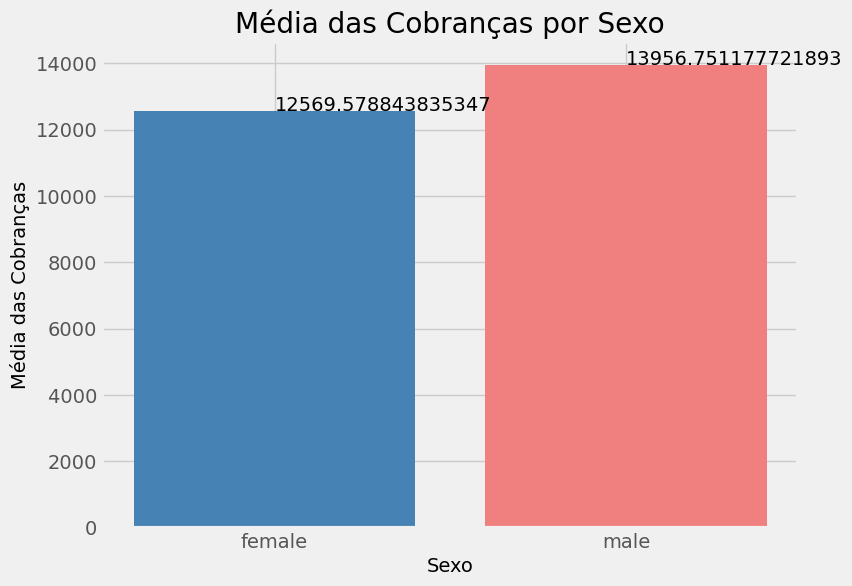

In [23]:
# Calcular a mpedia das cobranças por sexo
mean_charges_sex =  insurance.groupby('sex')['charges'].mean()

# Cores personalizadas para cada barra
colors = ['steelblue', 'lightcoral']

# Cria uma figura e um eixo

fig, ax = plt.subplots(figsize=(8,6))

# Plota o gráfico de barras com as cores personalizadas
ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=colors)

# Configurações dos rótulos dos eixos e título
ax.set_xlabel('Sexo')
ax.set_ylabel('Média das Cobranças')
ax.set_title('Média das Cobranças por Sexo')

# Adiciona manualmente os textos dos rótulos
ax.text(0, mean_charges_sex.values[0], mean_charges_sex.values[0])
ax.text(1, mean_charges_sex.values[1], mean_charges_sex.values[1])

# Exibe o Gráfico
plt.show()


Eu tentei fazer do jeito mais simples possível, mas tivemos alguns problemas, como a quantidade de decimais, a posição não centralizada (nós passamos o valor do eixo x, mas o Python entendeu que ali deveria ser o começo do texto e não o centro) e até mesmo o tamanho dos números me parecem pequenos demais. O importante é que entendemos a estrutura, certo? De qualquer forma, bora melhorar!

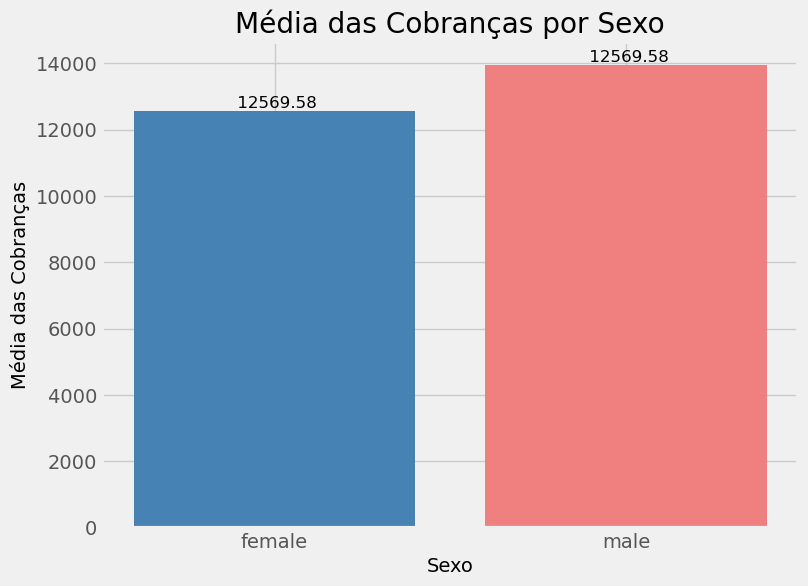

In [35]:
# Calcular a média das cobranças por sexo
mean_charges_sex = insurance.groupby('sex')['charges'].mean()

# Cores personalizadas para cada barra
colors = ['steelblue', 'lightcoral']

# Cria uma figura e um eixo
fig, ax = plt.subplots (figsize =(8, 6))

# Plota o gráfico de barras com as cores personalizadas
ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=colors)

# Configurações dos r[otulos dos eixos e títulos
ax.set_xlabel('Sexo') 
ax.set_ylabel('Média das Cobranças')
ax.set_title('Média das Cobranças por Sexo')

# Adiciona manualmente os textos dos rótulos com tamanho de fonte maior
ax.text(0, mean_charges_sex.values[0], f'{mean_charges_sex.values[0]: .2f}',
        ha='center', va= 'bottom', fontsize= 12)

ax.text(1, mean_charges_sex.values[1], f'{mean_charges_sex.values[0]: .2f}',
        ha='center', va= 'bottom', fontsize= 12)

# Exibe o Gráfico
plt.show()

Vamos dar um passo maior ainda? Que tal colocar uma caixa de mensagem apontando para a diferença entre os dois?

A primeira tentativa óbvia seria usar o próprio ax.text() que aprendemos:

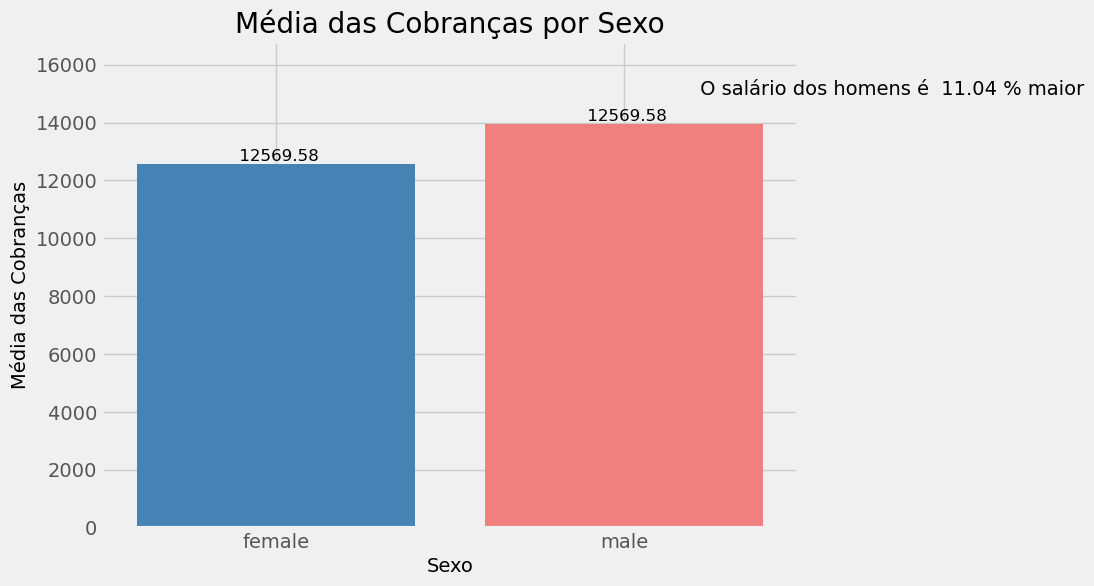

In [44]:
# Calcular a média das cobranças por sexo
mean_charges_sex = insurance.groupby('sex')['charges'].mean()

# Cores personalizadas para cada barra
colors = ['steelblue', 'lightcoral']

# Cria uma figura e um eixo
fig, ax = plt.subplots (figsize =(8, 6))

# Plota o gráfico de barras com as cores personalizadas
ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=colors)

# Configurações dos rótulos dos eixos e títulos
ax.set_xlabel('Sexo') 
ax.set_ylabel('Média das Cobranças')
ax.set_title('Média das Cobranças por Sexo')

# Adiciona manualmente os textos dos rótulos com tamanho de fonte maior
ax.text(0, 
        mean_charges_sex.values[0], 
        f'{mean_charges_sex.values[0]: .2f}',
        ha='center', va= 'bottom', fontsize= 12)

ax.text(1, 
        mean_charges_sex.values[1], 
        f'{mean_charges_sex.values[0]: .2f}',
        ha='center', va= 'bottom', fontsize= 12)

# Define os limites dos eixos x e y
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 16800)

# Calcula a diferença percentual entre os dois sexos
diff_percent= ( mean_charges_sex['male'] - mean_charges_sex['female']
) / mean_charges_sex['female'] * 100

# Mensagem sobre a diferença salarial ( coloquei um pouco mais alto)

ax.text(
    1.2, #posição no eixo x
    mean_charges_sex.values[1]+1000, #posição eixo y
    f' O salário dos homens é {diff_percent: .2f} % maior' #mensagem

)

#Exibe o gráfico 

plt.show()

Ele quase funcionou. Conseguimos ver a mensagem, mas temos muito a melhorar ainda, podemos, por exemplo, colocar a mensagem numa caixa, dando o devido destaque, e até alterar sua cor.

Isso não é difícil, basta fazer uso de mais um parâmetro, o bbox:

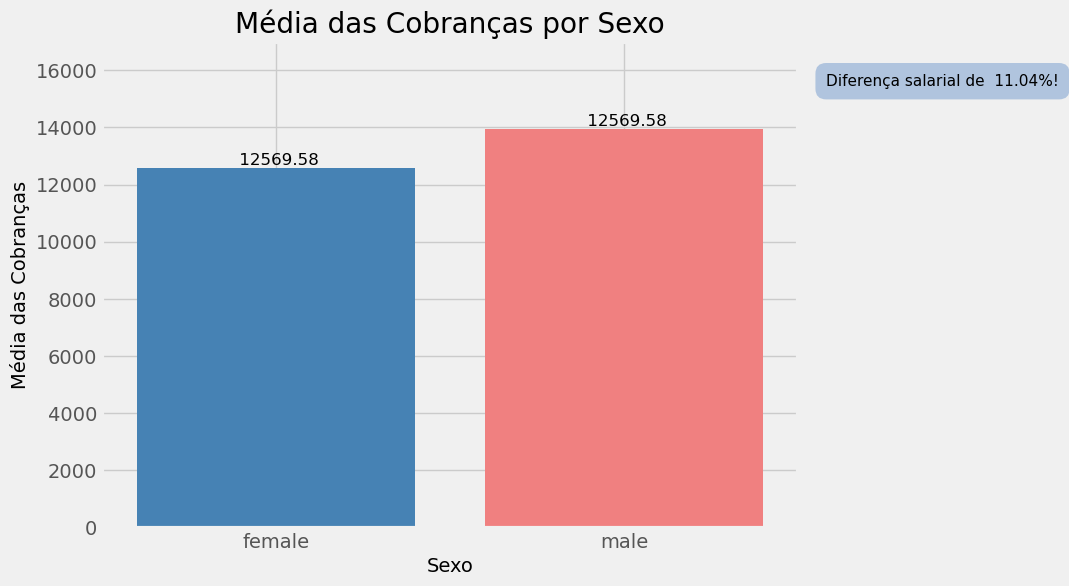

In [45]:
# Calcular a média das cobranças por sexo
mean_charges_sex = insurance.groupby('sex')['charges'].mean()

# Cores personalizadas para cada barra
colors = ['steelblue', 'lightcoral']

# Cria uma figura e um eixo
fig, ax = plt.subplots (figsize =(8, 6))

# Plota o gráfico de barras com as cores personalizadas
ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=colors)

# Configurações dos rótulos dos eixos e títulos
ax.set_xlabel('Sexo') 
ax.set_ylabel('Média das Cobranças')
ax.set_title('Média das Cobranças por Sexo')

# Adiciona manualmente os textos dos rótulos com tamanho de fonte maior
ax.text(0, 
        mean_charges_sex.values[0], 
        f'{mean_charges_sex.values[0]: .2f}',
        ha='center', va= 'bottom', fontsize= 12)

ax.text(1, 
        mean_charges_sex.values[1], 
        f'{mean_charges_sex.values[0]: .2f}',
        ha='center', va= 'bottom', fontsize= 12)

# Define os limites dos eixos x e y
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 17000)

# Calcula a diferença percentual entre os dois sexos
diff_percent= ( mean_charges_sex['male'] - mean_charges_sex['female']
) / mean_charges_sex['female'] * 100

# Mensagem sobre a diferença salarial
ax.text (
    1.58,
    mean_charges_sex.values[1]+1500,
    f'Diferença salarial de {diff_percent: .2f}%!',
    bbox = {'facecolor': 'lightsteelblue',
            'alpha':1,
            'pad': 0.7,
            'edgecolor':
            'none',
            'boxstyle': 'round'},
color = 'black',
fontsize = 11
)

#Exibe o gráfico

plt.show()

Vamos detalhar o parâmetro bbox e o que está contido nele:

O parâmetro bbox (bounding box) é usado para definir as propriedades de uma caixa que envolve o texto. É uma forma de delimitar a área da caixa que será exibida.

As propriedades contidas no bbox são:

- facecolor: Define a cor de fundo da caixa. Neste exemplo, definimos como lightsteelblue, que é uma tonalidade de azul claro.

- alpha: Define a transparência da caixa. O valor 1 indica que a caixa é totalmente opaca, enquanto valores menores que 1 deixam a caixa mais transparente. Neste exemplo, definimos como 1, ou seja, totalmente opaca.

- pad: Define o espaçamento interno da caixa. É a distância entre o texto e as bordas da caixa. Quanto maior o valor, maior será o espaçamento. Neste exemplo, definimos como 0.7.

- edgecolor: Define a cor da borda da caixa. none significa que não há borda. Podem ser utilizados nomes de cores ou códigos hexadecimais para especificar uma cor. Neste exemplo, definimos como none.

- boxstyle: Define o estilo da caixa. round especifica que as bordas da caixa são arredondadas. Outros estilos disponíveis incluem square, round4, larrow, rarrow, roundtooth, entre outros.

Essas propriedades permitem personalizar a aparência da caixa que envolve o texto. Você pode ajustar os valores das propriedades conforme necessário para obter o estilo desejado.

Além das propriedades do bbox, também é possível definir outras configurações para o texto, como:

- color: Define a cor do texto. Neste exemplo, definimos como black, que é preto.

- fontsize: Define o tamanho da fonte do texto. Neste exemplo, definimos como 11.

Você deve estar pensando neste momento "Nossa, é muita coisa". Assim, é e não é. Explico: sim, é muito conteúdo. Mas vale lembrar: olha o tanto de coisa que você sabe hoje que lá atrás nem teria ideia de que saberia na ponta da língua, pd.read_csv, df.info(), plot, import as, e por aí vai! No começo, sempre parece muita coisa, mas eu posso te assegurar que é tranquilo e que fica mais fácil ainda quando você pode pedir ajuda no Google ou no ChatGPT para te relembrar do que está faltando! Fique tranquilo, você vai pegar o jeito!

Agora, que tal dar uma revisada nas suas análises exploratórias do passado e incluir alguns detalhes? Ou repassar o conhecimento fazendo algum tutorial no Medium ou um post rápido no Linkedin! Vai lá interagir na comunidade e ganhar seu espaço!